# Social Data Mining: Text Analysis & Visualization Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [3]:
# Ensure NLTK downloads (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARSHDEEP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HARSHDEEP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Loading the dataset
df = pd.read_csv('acq.csv')
pd.set_option('display.max_colwidth', 2000)

In [3]:
# Renaming columns
df.columns = ["index", "docs"]

In [4]:
# Display a preview of the dataframe
print(df.head())

   index  \
0      0   
1      1   
2      2   
3      3   
4      4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

<b>Pre-processing<b>

In [5]:
# Converting our text to lowercase
df['processed_docs'] = df['docs'].str.lower()

In [6]:
# Defining regex patterns using raw strings for clarity
RE_TWEET = r"^rt\s+"
HYPERLINKS = r"http[s]?://\S+"
HASH = r"#\w+"
ATSIGN = r'@\w+'
PUNCTUATION = r"[^\w\s]"
NEWLINE = r"\n"

In [7]:
# Removing unwanted patterns using out regex substitutions
df['processed_docs'] = df['processed_docs'].apply(lambda x: re.sub(RE_TWEET, "", x))
df['processed_docs'] = df['processed_docs'].apply(lambda x: re.sub(HYPERLINKS, "", x))
df['processed_docs'] = df['processed_docs'].apply(lambda x: re.sub(HASH, "", x))
df['processed_docs'] = df['processed_docs'].apply(lambda x: re.sub(ATSIGN, "", x))
df['processed_docs'] = df['processed_docs'].apply(lambda x: re.sub(PUNCTUATION, "", x))
df['processed_docs'] = df['processed_docs'].apply(lambda x: re.sub(NEWLINE, " ", x))

In [8]:
# Creating a function to remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [9]:
# Applying stopwords removal
df['processed_docs'] = df['processed_docs'].apply(remove_stopwords)

In [10]:
df['processed_docs'] #Viewing our dataframe to confirm stopwords have been removed

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    computer terminal s

## Perfect, we're ready to begin our text analysis and viualization now!

<b>a) A histogram showing the distribution of word lengths:<b>

In [11]:
# Concatenating all processed documents into one big string
big_str = " ".join(df['processed_docs'])
words = big_str.split()

In [12]:
# Computing word lengths
word_lengths = [len(word) for word in words]

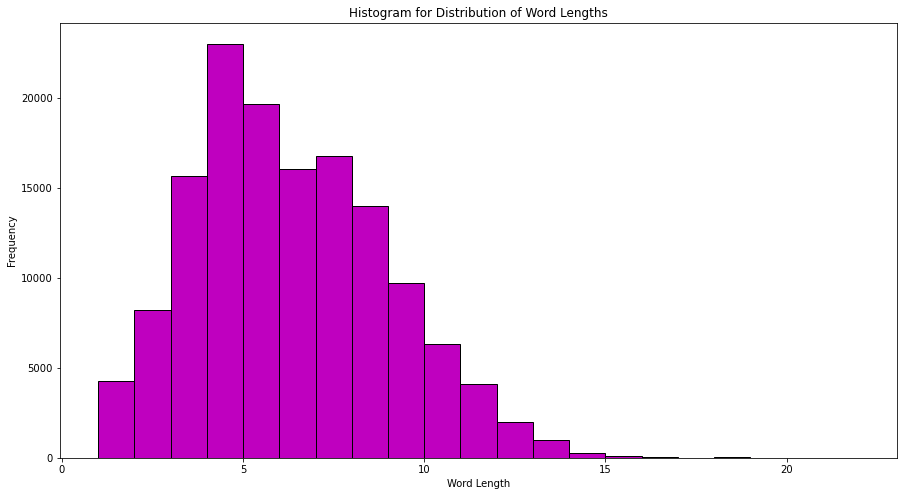

In [13]:
# Plotting the distribution
plt.figure(figsize=(15, 8))
plt.hist(word_lengths, bins=range(1, max(word_lengths) + 2), color='m', edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title("Histogram for Distribution of Word Lengths")
plt.show()

<b>b) A histogram showing the distribution of sentence lengths:<b>

In [14]:
# Using original docs for sentence splitting
full_text = " ".join(df['docs'])

In [15]:
# Splitting on periods, question marks, or exclamation points
sentences = re.split(r'[.!?]+', full_text)

In [16]:
# Removing any empty sentences
sentences = [s.strip() for s in sentences if s.strip() != '']

In [17]:
# Computing sentence lengths (in characters)
sentence_lengths = [len(s) for s in sentences]
sentence_lengths

[230,
 1,
 43,
 83,
 18,
 242,
 168,
 17,
 170,
 18,
 99,
 134,
 98,
 191,
 161,
 73,
 148,
 131,
 7,
 35,
 25,
 1,
 1,
 83,
 1,
 167,
 41,
 1,
 38,
 103,
 133,
 26,
 80,
 39,
 279,
 114,
 159,
 262,
 40,
 130,
 201,
 99,
 50,
 96,
 82,
 9,
 267,
 275,
 244,
 275,
 175,
 116,
 155,
 112,
 197,
 213,
 128,
 172,
 219,
 36,
 38,
 272,
 43,
 368,
 262,
 82,
 276,
 241,
 45,
 16,
 148,
 290,
 119,
 124,
 107,
 133,
 124,
 57,
 77,
 1,
 16,
 248,
 96,
 40,
 214,
 53,
 95,
 41,
 88,
 51,
 184,
 124,
 17,
 109,
 90,
 69,
 37,
 137,
 136,
 67,
 104,
 113,
 97,
 107,
 1,
 30,
 243,
 118,
 94,
 190,
 68,
 24,
 201,
 90,
 191,
 124,
 68,
 123,
 144,
 35,
 281,
 130,
 87,
 122,
 211,
 133,
 103,
 102,
 139,
 83,
 157,
 4,
 29,
 5,
 62,
 47,
 23,
 102,
 1,
 73,
 35,
 1,
 52,
 90,
 95,
 1,
 13,
 114,
 258,
 162,
 176,
 1,
 61,
 43,
 149,
 355,
 123,
 83,
 120,
 30,
 229,
 63,
 58,
 31,
 78,
 160,
 278,
 86,
 80,
 209,
 136,
 1,
 10,
 148,
 161,
 132,
 205,
 39,
 54,
 60,
 151,
 65,
 111,
 20,
 106,


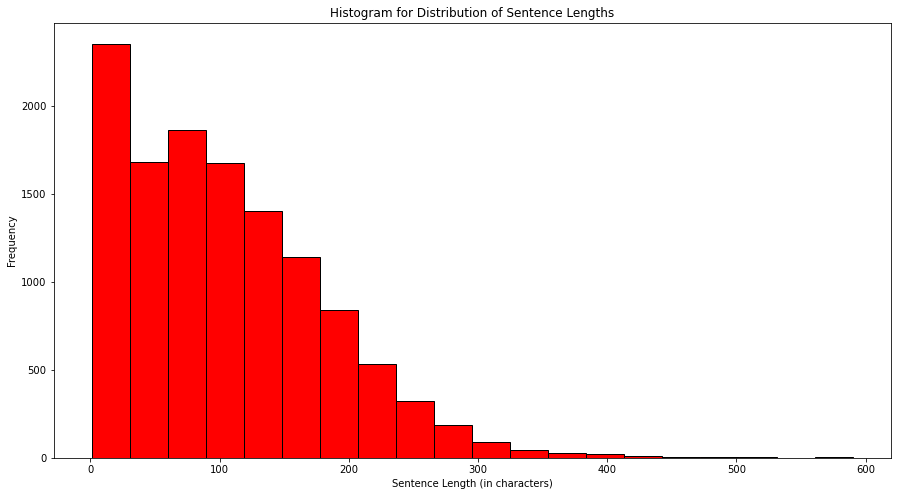

In [18]:
# Plotting the distribution
plt.figure(figsize=(15, 8))
plt.hist(sentence_lengths, bins=20, color='r', edgecolor='black')
plt.xlabel('Sentence Length (in characters)')
plt.ylabel('Frequency')
plt.title("Histogram for Distribution of Sentence Lengths")
plt.show()

<b>c) Top frequent words before and after data preprocessing:<b>

In [19]:
# Before preprocessing (using original 'docs')
text_before = " ".join(df['docs'])
words_before = text_before.split()
topf_before = Counter(words_before).most_common(10)

In [20]:
# After preprocessing (using big_str)
topf_after = Counter(words).most_common(10)

In [21]:
# Unzipping the results for plotting
words_before_labels, freq_before = zip(*topf_before)
words_after_labels, freq_after = zip(*topf_after)

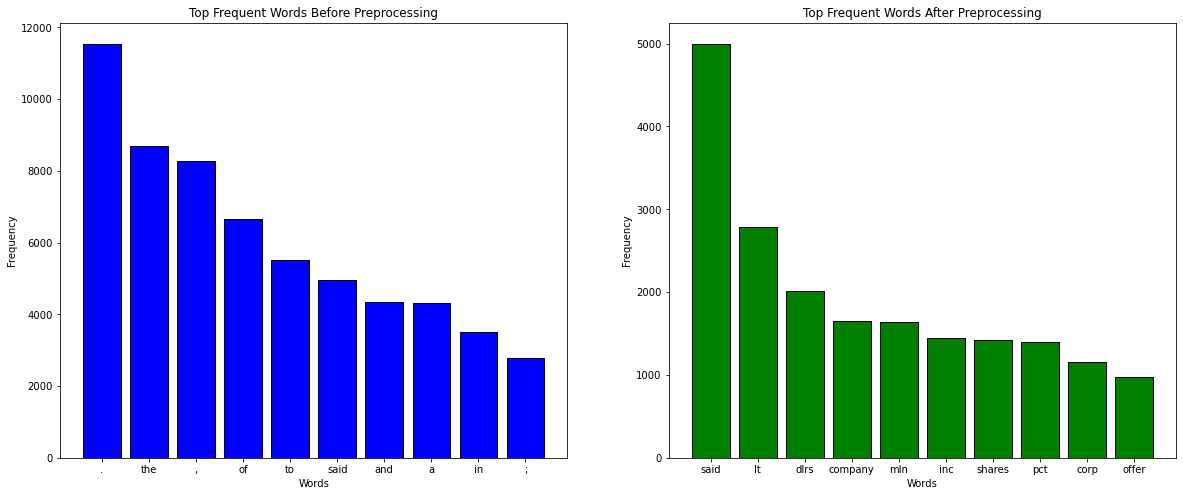

In [22]:
# Plotting bar graphs for the two distributions
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].bar(words_before_labels, freq_before, color='blue', edgecolor='black')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Top Frequent Words Before Preprocessing')

axes[1].bar(words_after_labels, freq_after, color='green', edgecolor='black')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Top Frequent Words After Preprocessing')
plt.show()

<b>d) Top frequent pairs of words after pre-processing. These are pairs of words which
appear together in sentences and are called bigrams.<b>

In [23]:
# Tokenizing using NLTK
nltk_tokens = nltk.word_tokenize(big_str)
# Creating a list of bigrams using NLTK bigrams funtion over our tokens
bg = list(nltk.bigrams(nltk_tokens))

In [40]:
# Creating a Counter object to count the frequency of bigrams and retrieve the top 10 most common bigrams
counter_bg = Counter(bg)
topf_bg = counter_bg.most_common(10)
print(topf_bg)

[(('mln', 'dlrs'), 982), (('company', 'said'), 470), (('inc', 'said'), 425), (('corp', 'said'), 311), (('dlrs', 'share'), 265), (('per', 'share'), 263), (('common', 'stock'), 222), (('tender', 'offer'), 220), (('corp', 'lt'), 195), (('inc', 'lt'), 190)]


In [34]:
# Extracting bigram word pairs and their corresponding frequencies from topf_bg
bigrams = list(zip(*topf_bg))[0]
frequency = list(zip(*topf_bg))[1]

In [35]:
# Converting tuple of tuples into list of words seperated by space to pass to plt.bar 
bi_list = []
for i in range(10):
    separator = ' '
    output = separator.join(bigrams[i])
    bi_list.append(output)
bi_list

['mln dlrs',
 'company said',
 'inc said',
 'corp said',
 'dlrs share',
 'per share',
 'common stock',
 'tender offer',
 'corp lt',
 'inc lt']

[]

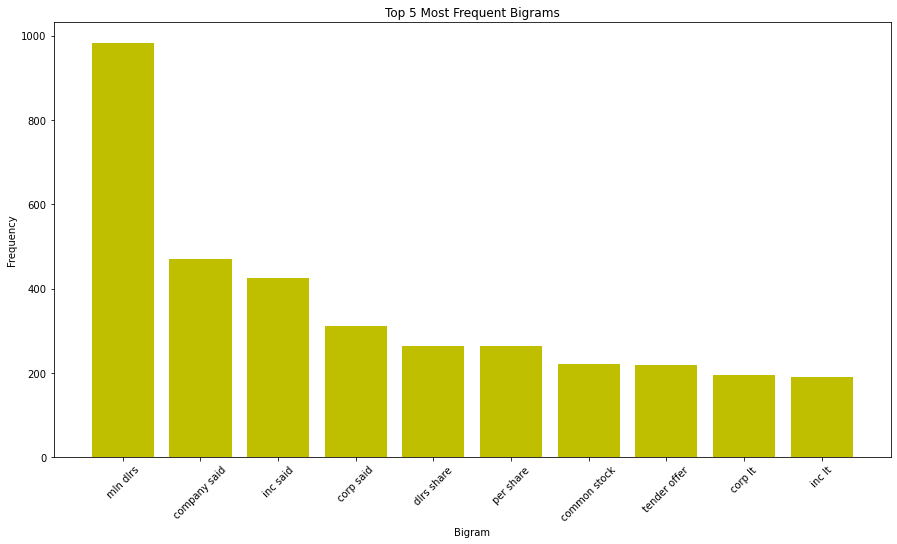

In [36]:
# Plotting a bar graph for the top 10 most frequent bigrams with their respective frequencies
plt.figure(figsize=(15,8))
plt.bar(bi_list,frequency,color='y')
plt.xlabel('Bigram')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequent Bigrams')
plt.plot()

<b>e) Top frequent tuples of words after pre-processing. Tuples are 3 words which
appear together in sentences and are called trigrams.<b>

In [37]:
nltk_tokens = nltk.word_tokenize(big_str)  	
tg = list(nltk.trigrams(nltk_tokens))
tg

[('computer', 'terminal', 'systems'),
 ('terminal', 'systems', 'lt'),
 ('systems', 'lt', 'cpml'),
 ('lt', 'cpml', 'completes'),
 ('cpml', 'completes', 'sale'),
 ('completes', 'sale', 'computer'),
 ('sale', 'computer', 'terminal'),
 ('computer', 'terminal', 'systems'),
 ('terminal', 'systems', 'inc'),
 ('systems', 'inc', 'said'),
 ('inc', 'said', 'completed'),
 ('said', 'completed', 'sale'),
 ('completed', 'sale', '200'),
 ('sale', '200', '000'),
 ('200', '000', 'shares'),
 ('000', 'shares', 'common'),
 ('shares', 'common', 'stock'),
 ('common', 'stock', 'warrants'),
 ('stock', 'warrants', 'acquire'),
 ('warrants', 'acquire', 'additional'),
 ('acquire', 'additional', 'one'),
 ('additional', 'one', 'mln'),
 ('one', 'mln', 'shares'),
 ('mln', 'shares', 'lt'),
 ('shares', 'lt', 'sedio'),
 ('lt', 'sedio', 'n'),
 ('sedio', 'n', 'v'),
 ('n', 'v', 'lugano'),
 ('v', 'lugano', 'switzerland'),
 ('lugano', 'switzerland', '50'),
 ('switzerland', '50', '000'),
 ('50', '000', 'dlrs'),
 ('000', 'dlrs'

In [41]:
# Creating a Counter object to count the frequency of trigrams and retrieve the top 10 most common bigrams
counter_tg = Counter(tg)
topf_tg = counter_tg.most_common(10)
print(topf_tg)

[(('securities', 'exchange', 'commission'), 168), (('dlrs', 'per', 'share'), 151), (('filing', 'securities', 'exchange'), 78), (('pct', 'total', 'outstanding'), 74), (('mln', 'dlrs', 'cash'), 62), (('5', 'mln', 'dlrs'), 59), (('dlr', 'per', 'share'), 58), (('signed', 'letter', 'intent'), 54), (('told', 'securities', 'exchange'), 50), (('outstanding', 'common', 'stock'), 48)]


In [43]:
# Extracting the trigrams and their corresponding frequencies from the most common trigrams
trigrams = list(zip(*topf_tg))[0]
frequency = list(zip(*topf_tg))[1]

In [44]:
# Converting the top 10 trigrams into strings, separated by spaces, for easier plotting
tri_list = []
for i in range(10):
    separator = ' '
    output = separator.join(trigrams[i])
    tri_list.append(output)
tri_list

['securities exchange commission',
 'dlrs per share',
 'filing securities exchange',
 'pct total outstanding',
 'mln dlrs cash',
 '5 mln dlrs',
 'dlr per share',
 'signed letter intent',
 'told securities exchange',
 'outstanding common stock']

[]

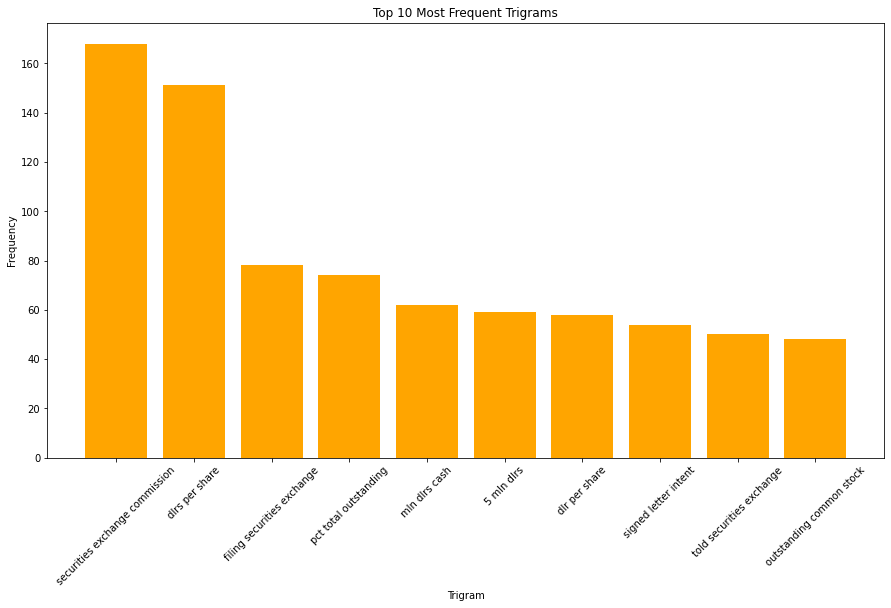

In [45]:
# Plotting a bar graph for the top 10 most frequent trigrams with their respective frequencies
plt.figure(figsize=(15,8))
plt.bar(tri_list,frequency,color='orange')
plt.xlabel('Trigram')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Trigrams')
plt.plot()

# Conclusion

In this project, we have explored the process of text analysis on a given dataset using Python's powerful libraries, including NLTK and Matplotlib. The following key steps were performed:

1. **Data Preprocessing**:
   - Regular expressions were applied to clean the data by removing unwanted elements like hashtags, mentions, retweets, hyperlinks, and punctuation.
   - Stop words were removed to retain only the most relevant words for further analysis.

2. **Visualization**:
   - **Histogram of Word Lengths**: We visualized the distribution of word lengths to understand the structure of the text.
   - **Histogram of Sentence Lengths**: A similar visualization was created to analyze the distribution of sentence lengths.

3. **Frequent Words**:
   - We identified the top frequent words in the dataset before and after preprocessing to observe the impact of data cleaning.
   - Bar plots were used to visualize these frequent words.

4. **Bigrams and Trigrams**:
   - **Bigrams (2-word combinations)**: We extracted the top frequent bigrams using NLTK's `bigrams()` function, which revealed pairs of words that frequently appeared together.
   - **Trigrams (3-word combinations)**: Similarly, the top frequent trigrams were extracted using the `trigrams()` function to analyze triplets of words.

By the end of this analysis, we gained insights into the structure of the text, common word pairs and triplets, and how text preprocessing impacts the final results. This project demonstrates how text mining and visualization techniques can be applied to large datasets for extracting meaningful patterns.

The results from this notebook can be useful for various natural language processing (NLP) tasks such as text classification, sentiment analysis, and more.
